In [1]:
import pandas as pd 
import numpy as np
import random 
import math
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
cities='ABCDE'
tsp_path = np.array([['NA',9,6,7,'NA'],[9,'NA',3,'NA',10],[6,3,'NA',5,4],[7,'NA',5,'NA',8],['NA',10,4,8,'NA']])

In [3]:
G = nx.Graph()
G.add_nodes_from("ABCDE")
alred =[]
for i in range(len(tsp_path)):
    for j in range(len(tsp_path[i])):
        if tsp_path[i][j]!='NA' and (i,j) not in alred and (j,i) not in alred:
            G.add_edges_from([(cities[i],cities[j])],weight=tsp_path[i][j])
            alred.append((i,j))

In [4]:
alred

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 4), (2, 3), (2, 4), (3, 4)]

In [5]:
G.edges

EdgeView([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'E'), ('C', 'D'), ('C', 'E'), ('D', 'E')])

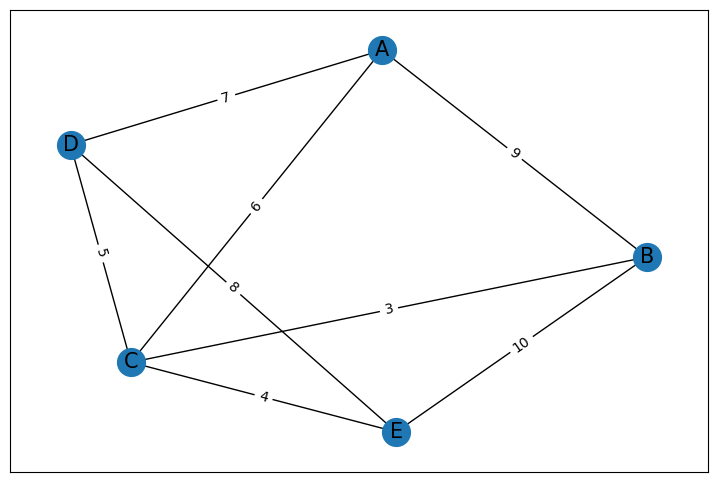

In [6]:
plt.figure(figsize=(9,6))
pos = nx.spring_layout(G,seed=42)
nx.draw_networkx(G,pos,font_size=15,node_size=400,width=1)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v): w['weight'] for u,v,w in G.edges(data=True)})
plt.savefig("Input.png")
plt.show()

In [7]:
paths=[]

In [8]:
def path(tsp_path,i,not_visit,path1,cities):
    count = 0
    for j in range(0,len(tsp_path[i])):
        if cities[j] not in not_visit  and tsp_path[i][j]!='NA':
            not_visit.append(cities[j])
            path1 = path1 +'-'+cities[j]
            path(tsp_path,j,not_visit,path1,cities)
            not_visit.pop()
            path1 = path1[:-2]
            count+=1
    if(count==0):
        if(len(path1)==(len(cities)*2)-1):
            paths.append(path1)

In [9]:
for i in range(0,len(cities)):
    not_visit=[]
    not_visit.append(cities[i])
    path(tsp_path,i,not_visit,cities[i],cities)

In [10]:
new_paths = []
for i in range(0,len(paths)):
    if tsp_path[cities.index(paths[i][-1])][cities.index(paths[i][0])]!='NA':
        new_paths.append(paths[i] + "-" + paths[i][0])

In [11]:
new_paths

['A-B-C-E-D-A',
 'A-B-E-C-D-A',
 'A-B-E-D-C-A',
 'A-C-B-E-D-A',
 'A-C-D-E-B-A',
 'A-D-C-E-B-A',
 'A-D-E-B-C-A',
 'A-D-E-C-B-A',
 'B-A-C-D-E-B',
 'B-A-D-C-E-B',
 'B-A-D-E-C-B',
 'B-C-A-D-E-B',
 'B-C-E-D-A-B',
 'B-E-C-D-A-B',
 'B-E-D-A-C-B',
 'B-E-D-C-A-B',
 'C-A-B-E-D-C',
 'C-A-D-E-B-C',
 'C-B-A-D-E-C',
 'C-B-E-D-A-C',
 'C-D-A-B-E-C',
 'C-D-E-B-A-C',
 'C-E-B-A-D-C',
 'C-E-D-A-B-C',
 'D-A-B-C-E-D',
 'D-A-B-E-C-D',
 'D-A-C-B-E-D',
 'D-C-A-B-E-D',
 'D-C-E-B-A-D',
 'D-E-B-A-C-D',
 'D-E-B-C-A-D',
 'D-E-C-B-A-D',
 'E-B-A-C-D-E',
 'E-B-A-D-C-E',
 'E-B-C-A-D-E',
 'E-C-B-A-D-E',
 'E-C-D-A-B-E',
 'E-D-A-B-C-E',
 'E-D-A-C-B-E',
 'E-D-C-A-B-E']

In [12]:
df = pd.DataFrame(data=new_paths,columns=["possible paths"])

In [13]:
def Score(path):
    total = 0 
    for i in range(0,len(path)-1,2):
        total+=(int)(tsp_path[cities.find(path[i])][cities.find(path[i+2])])
    return total
Cost = np.vectorize(Score)(np.array(new_paths))
df['Cost'] = Cost


In [14]:
df.head()

,possible paths,Cost
0,A-B-C-E-D-A,31
1,A-B-E-C-D-A,35
2,A-B-E-D-C-A,38
3,A-C-B-E-D-A,34
4,A-C-D-E-B-A,38


# Procedure
### Based on tournament selection choose top 2 parent 
### Cross over using bit wise swap
### Mutation Bit wise
### Updated it

In [15]:
def RandomKSelect(K,par,df):
    count=0
    lst = []
    while(count!=K):
        temp = random.randint(0,df.shape[0]-1)
        if(temp not in lst and temp!=par):
            lst.append(temp)
            count+=1
    return lst
# pare1  = RandomKSelect(4,None)
# parent1 = pare1[df['Cost'][pare1].argmin()]
# pare2 = RandomKSelect(4,parent1)
# parent2 = pare2[df['Cost'][pare2].argmin()]

In [16]:
def Min(df,par):
    s = df[['Cost']].iloc[par]
    Min = list(s.values)
    temp = [list(i) for i in Min]
    ans = sorted(temp)[0]
    return par[temp.index(ans)]

In [17]:
def CrossX(par1,par2,tsp_path,cities):
    for i in range(1,len(par1)-1,4):
        if((par2[i] not in par1[:i]) and (tsp_path[cities.find(par2[i])][cities.find(par1[i-2])]!="NA") and (tsp_path[cities.find(par2[i])][cities.find(par1[i+2])]!="NA")):
            par1 = par1[:i] + par2[i] + par1[i+1:]
        if((par1[i] not in par2[:i])  and (tsp_path[cities.find(par1[i])][cities.find(par2[i-2])]!="NA") and (tsp_path[cities.find(par1[i])][cities.find(par2[i+2])]!="NA") ):
            par2 = par2[:i] + par1[i] + par2[i+1:]
    return par1,par2

# new_cross = np.array(CrossX(df['possible paths'][parent2],df['possible paths'][parent1]))

CrossX('D-A-B-C-E-D','C-E-D-A-B-C',tsp_path,cities)

('D-A-B-C-E-D', 'C-E-D-A-B-C')

In [18]:
def Mutate(new_cross,tsp_path,cities):
    gen =[]
    for i in range(0,len(new_cross)):
        genome = new_cross[i]
        pos1 = -1
        pos2 = -1
        c = 1
        d = 1
        e = 1 
        f = 1
        while(not(not(c) and not(d) and not(e) and not(f))):
            pos1 = random.randint(0,len(cities)-1)
            pos2 = random.randint(0,len(cities)-1)
            while(cities[pos1]==genome[0] or cities[pos2]==genome[0] or pos1==pos2):
                pos1 = random.randint(0,len(cities)-1)
                pos2 = random.randint(0,len(cities)-1)
            if(genome.find(cities[pos1]) - 2 >=0):
                c = tsp_path[cities.find(genome[genome.find(cities[pos1])-2])][pos2]=='NA' 
            else :
                c = 0
            if(genome.find(cities[pos1]) + 2 < len(genome)):
                d = tsp_path[cities.find(genome[genome.find(cities[pos1]) + 2])][pos2]=='NA'
            else:
                d = 0
            if(genome.find(cities[pos2])-2 >=0):
                e = tsp_path[cities.find(genome[genome.find(cities[pos2])-2])][pos1]=='NA'
            else:
                e = 0
            if(genome.find(cities[pos2])+2 < len(genome)):
                f = tsp_path[cities.find(genome[genome.find(cities[pos2]) + 2 ])][pos1]=='NA'
            else:
                f = 0
        new_genome=""
        for q in genome:
            if q==cities[pos1]:
                new_genome += cities[pos2]
            elif q==cities[pos2]:
                new_genome += cities[pos1]
            else:
                new_genome += q
        gen.append(new_genome)
    return gen

In [19]:
def Updater(parent1,parent2,new_cross,Cost,df,New_path,Costn):
    Update_path = list(df['possible paths']) 
    Update_cost = list(df['Cost'])
    new_df = pd.DataFrame()
    parent = [parent1,parent2]
    loc_opt_cost = Cost.min()
    if(loc_opt_cost>Costn):
        new_cross[Cost.argmin()] = New_path[0]
        Cost[Cost.argmin()] =   Costn
    for i in range(0,2):
        Update_path[parent[i]] = new_cross[i]
        Update_cost[parent[i]] = Cost[i]
    new_df['possible paths'] = np.array(Update_path)
    new_df['Cost'] = np.array(Update_cost)
    return new_df

# Updater()

In [20]:
def percent(df):
    D = df['Cost'].value_counts()
    S = [(D[i]/df.shape[0])*100 for i in D.keys()]
    i = max(S)
    return  i,list(D.keys())[S.index(i)]
    

In [21]:
def Simulated_annealing(c,df,tsp_path,cities):
    init_temp = 1.0e+300
    end_temp = 1
    cool_fact = 0.99
    start_temp = init_temp
    state = np.array([df['possible paths'][c]])
    curr_score = np.vectorize(Score)(state)[0]
    while (start_temp > end_temp):
        new_path = np.array(Mutate(state,tsp_path,cities))
        new_score = np.vectorize(Score)(new_path)[0]
        dif = new_score - curr_score
        if( dif > 0 or math.exp( (-1 * dif)/start_temp ) > random.random()):
            state = new_path
            curr_score  = new_score
        start_temp = start_temp *  cool_fact
    return (state,curr_score)

In [22]:
def my_kernel(df,cities,tsp_path):
    F,value = percent(df)
    for i in tqdm(range(1000)):
        pare1  = RandomKSelect(4,None,df)
        parent1 = Min(df,pare1)
        pare2 = RandomKSelect(4,parent1,df)
        parent2 = Min(df,pare2)
        new_cross = np.array(CrossX(df['possible paths'][parent2],df['possible paths'][parent1],tsp_path,cities))
        new_cross = np.array(Mutate(new_cross,tsp_path,cities))
        Cost = np.vectorize(Score)(new_cross)
        X = Simulated_annealing(random.randint(0,df.shape[0]-1),df,tsp_path,cities)
        df = Updater(parent1,parent2,new_cross,Cost,df,X[0],X[1])
        F,value = percent(df)
    return [F,value]
Out = my_kernel(df,cities,tsp_path)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [1:05:27<00:00,  3.93s/it] 


In [23]:
print("Best Path:",df.iloc[Out[1]])

Best Path: possible paths    E-D-A-C-B-E
Cost                       34
Name: 38, dtype: object


In [24]:
def Output_maker(i):
    out =[]
    for j in range(0,len(i)-1,2):
        out.append((i[j],i[j+2]))
    return out

In [25]:
Best = Output_maker(df.iloc[Out[1]]['possible paths'])

In [26]:
Best

[('E', 'D'), ('D', 'A'), ('A', 'C'), ('C', 'B'), ('B', 'E')]

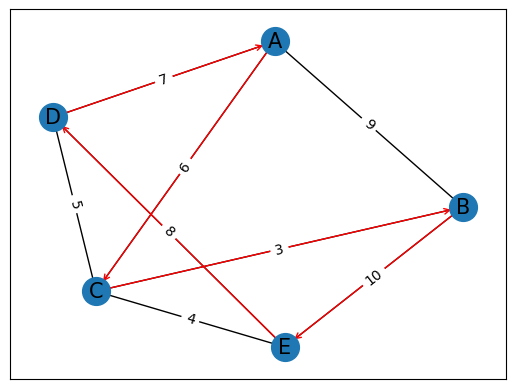

In [27]:
nx.draw_networkx(G,pos,font_size=15,node_size=400,width=1)
# nx.draw_networkx_edges(G,pos,edgelist=Best,edge_color='red')
nx.draw_networkx_edges(G,pos,edgelist=Best,edge_color='red',arrowstyle="->",arrows=True)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v): w['weight'] for u,v,w in G.edges(data=True)})
plt.savefig('Output.png')
plt.show()

## END